# Pandas Playground

A space to explore the core foundations of Pandas.

From video: https://youtu.be/EhYC02PD_gc

In [ ]:
%pip install pandas scikit-learn matplotlib
import pandas as pd

## Basics of playing with data structures

In [3]:
# Series
s = pd.Series(
    [10, 20, 30, 40, 50],
    index = ["a", "b", "c", "d", "e"],
)

s

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [211]:
# Data Frame
df = pd.DataFrame({
    'name': ['Mike', 'Bob', 'Alice'],
    'age': [30, 80, 45],
    'job': ['Programmer', 'Clerk', 'Designer']
})

print(df)
print("\n")

df = df.set_index('name')

print(df)

    name  age         job
0   Mike   30  Programmer
1    Bob   80       Clerk
2  Alice   45    Designer


       age         job
name                  
Mike    30  Programmer
Bob     80       Clerk
Alice   45    Designer


In [212]:
# Get entry at index
df.loc['Bob']

age       80
job    Clerk
Name: Bob, dtype: object

In [213]:
# Get property of entry at index
df.loc['Bob', 'age'] # to do this faster use df.at['Bob', 'age'] but this can only be used to get a single value

80

In [214]:
# Use the numerical index when we have another one set
df.iloc[2]

# we also have df.iloc[0,3] to get a value and df.iat[0,3] (faster) to do the same

age          45
job    Designer
Name: Alice, dtype: object

In [215]:
# to set values do
df.at['Alice', 'age'] = 65

df

,age,job
name,,
Mike,30,Programmer
Bob,80,Clerk
Alice,65,Designer


In [216]:
# to set rows
df.loc['Alice'] = [70, 'Programmer']
df

,age,job
name,,
Mike,30,Programmer
Bob,80,Clerk
Alice,70,Programmer


In [217]:
# Adding a new entry
df.loc['Nu'] = [20, 'Junior Dev']
df

,age,job
name,,
Mike,30,Programmer
Bob,80,Clerk
Alice,70,Programmer
Nu,20,Junior Dev


In [218]:
# Retrieve a specific range of columns
df.iloc[0:2]

,age,job
name,,
Mike,30,Programmer
Bob,80,Clerk


In [219]:
# Retrieve just the nth column
df.iloc[:, 1]

name
Mike     Programmer
Bob           Clerk
Alice    Programmer
Nu       Junior Dev
Name: job, dtype: object

In [220]:
# Multiply all entries in a colunm
df.age * 2

name
Mike      60
Bob      160
Alice    140
Nu        40
Name: age, dtype: int64

In [221]:
# Perform an operation and save it back in
df.age = df.age + 1
df

,age,job
name,,
Mike,31,Programmer
Bob,81,Clerk
Alice,71,Programmer
Nu,21,Junior Dev


## Manipulating data in bulk

In [222]:
# Playing with indexes and combining frames with math

df1 = pd.DataFrame({
    'a': [1, 2 ,3]
})

df2 = pd.DataFrame({
    'a': [10, 20, 30]
})

print(df1 + df2)

df3 = pd.DataFrame({
    'a': [10, 20, 30]
}, index = [1, 2, 0])

print("\n")
print(df1 + df3)

    a
0  11
1  22
2  33


    a
0  31
1  12
2  23


In [223]:
# Apply a function to a column

def myFunc(x):
    if x % 3 == 0:
        return x ** 2
    else:
        return x // 2

df.age.apply(myFunc)
# we could do df.age = df.age.apply(myFunc)

name
Mike       15
Bob      6561
Alice      35
Nu        441
Name: age, dtype: int64

In [224]:
# or to create a new column
df['summary'] = df.apply(lambda row: 'Amazing' if row['job'] == 'Programmer' and row['age'] > 40 else 'Ok', axis=1)
df

,age,job,summary
name,,,
Mike,31,Programmer,Ok
Bob,81,Clerk,Ok
Alice,71,Programmer,Amazing
Nu,21,Junior Dev,Ok


In [225]:
# to remove the column
df.drop('summary', axis=1)

,age,job
name,,
Mike,31,Programmer
Bob,81,Clerk
Alice,71,Programmer
Nu,21,Junior Dev


In [226]:
# or if we want to drop multiple
df.drop(['age', 'job'], axis=1)

,summary
name,
Mike,Ok
Bob,Ok
Alice,Amazing
Nu,Ok


In [227]:
df.at['Nu', 'age'] = float('nan')

# If we want to drop all rows with nan values
df.dropna()

,age,job,summary
name,,,
Mike,31.0,Programmer,Ok
Bob,81.0,Clerk,Ok
Alice,71.0,Programmer,Amazing


In [228]:
# or to fill the nan values with a value
print(
    df.fillna(0)
)

# or we can fill using th result of a function
df = df.fillna(df.age.mean())
print(df)

        age         job  summary
name                            
Mike   31.0  Programmer       Ok
Bob    81.0       Clerk       Ok
Alice  71.0  Programmer  Amazing
Nu      0.0  Junior Dev       Ok
        age         job  summary
name                            
Mike   31.0  Programmer       Ok
Bob    81.0       Clerk       Ok
Alice  71.0  Programmer  Amazing
Nu     61.0  Junior Dev       Ok


In [230]:
df.at['Bob', 'job'] = None # None also counts as na
df.notna() # Shows na as False

,age,job,summary
name,,,
Mike,True,True,True
Bob,True,False,True
Alice,True,True,True
Nu,True,True,True


## Iterating

In [233]:
# Iterating through rows
for i, row in df.iterrows():
    print(i)
    print('----')
    print(row)
    print("\n")

Mike
----
age              31.0
job        Programmer
summary            Ok
Name: Mike, dtype: object


Bob
----
age        81.0
job        None
summary      Ok
Name: Bob, dtype: object


Alice
----
age              71.0
job        Programmer
summary       Amazing
Name: Alice, dtype: object


Nu
----
age              61.0
job        Junior Dev
summary            Ok
Name: Nu, dtype: object




In [235]:
# Iterating through the columns
for i, col in df.items():
    print(i)
    print('---')
    print(col)
    print("\n")

age
---
name
Mike     31.0
Bob      81.0
Alice    71.0
Nu       61.0
Name: age, dtype: float64


job
---
name
Mike     Programmer
Bob            None
Alice    Programmer
Nu       Junior Dev
Name: job, dtype: object


summary
---
name
Mike          Ok
Bob           Ok
Alice    Amazing
Nu            Ok
Name: summary, dtype: object




## Filtering and querying

In [241]:
# Performing an operation on a column returns a list of booleans
print(df.age > 50)
print("\n")

# Passing a list of booleans in the squarte brackets returns items where True
print(df[[False, False, True, True]])
print("\n")

# Therefore we can filter like this!
df[df.age > 50]

name
Mike     False
Bob       True
Alice     True
Nu        True
Name: age, dtype: bool


        age         job  summary
name                            
Alice  71.0  Programmer  Amazing
Nu     61.0  Junior Dev       Ok




,age,job,summary
name,,,
Bob,81.0,None,Ok
Alice,71.0,Programmer,Amazing
Nu,61.0,Junior Dev,Ok


In [248]:
# or even this!
df[(df.age > 40) & (df.job == 'Programmer')]

,age,job,summary
name,,,
Alice,71.0,Programmer,Amazing


In [252]:
import datetime as dt

df['birthday'] = df['age'].apply(lambda x: dt.datetime.now() - dt.timedelta(days=365*x))
df[df.birthday.dt.year > 1950] # note how we use the dt to specify the datatype

,age,job,summary,birthday
name,,,,
Mike,31.0,Programmer,Ok,1994-03-10 11:51:13.789264
Alice,71.0,Programmer,Amazing,1954-03-20 11:51:13.789283
Nu,61.0,Junior Dev,Ok,1964-03-17 11:51:13.789285


In [254]:
df[df.age.isin([31, 71])]

,age,job,summary,birthday
name,,,,
Mike,31.0,Programmer,Ok,1994-03-10 11:51:13.789264
Alice,71.0,Programmer,Amazing,1954-03-20 11:51:13.789283


In [257]:
df.query('age > 30') # this is faster because it uses numexpr but not as sophisticated

,age,job,summary,birthday
name,,,,
Mike,31.0,Programmer,Ok,1994-03-10 11:51:13.789264
Bob,81.0,None,Ok,1944-03-22 11:51:13.789281
Alice,71.0,Programmer,Amazing,1954-03-20 11:51:13.789283
Nu,61.0,Junior Dev,Ok,1964-03-17 11:51:13.789285


In [264]:
df.job = df.job.fillna('Programmer') # Let's give Bob a job
df = df.drop('summary', axis=1)
df

,age,job,birthday
name,,,
Mike,31.0,Programmer,1994-03-10 11:51:13.789264
Bob,81.0,Programmer,1944-03-22 11:51:13.789281
Alice,71.0,Programmer,1954-03-20 11:51:13.789283
Nu,61.0,Junior Dev,1964-03-17 11:51:13.789285


## Grouping & Sorting

In [265]:
df.groupby('job').agg({ 'age': 'mean' })

,age
job,
Junior Dev,61.0
Programmer,61.0


In [266]:
df.groupby('job').agg({ 'age': ['mean', 'min', 'max'] })

age            
            mean   min   max
job                         
Junior Dev  61.0  61.0  61.0
Programmer  61.0  31.0  81.0

In [268]:
df.sort_values('age')

,age,job,birthday
name,,,
Mike,31.0,Programmer,1994-03-10 11:51:13.789264
Nu,61.0,Junior Dev,1964-03-17 11:51:13.789285
Alice,71.0,Programmer,1954-03-20 11:51:13.789283
Bob,81.0,Programmer,1944-03-22 11:51:13.789281


## Merging and Concatenating

In [270]:
df1 = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Price': [10, 20, 30]
})

df2 = pd.DataFrame({
    'Item': ['D', 'E', 'F'],
    'Price': [40, 50, 60]
})

In [279]:
pd.concat([df1, df2]).reset_index().drop('index', axis=1)

,Item,Price
0,A,10
1,B,20
2,C,30
3,D,40
4,E,50
5,F,60


In [273]:
df1 = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Price': [10, 20, 30]
})

df_extra_cols = pd.DataFrame({
    'Country': ['AU', 'NZ', 'UK'],
    'In Sock': [True, True, False]
})
pd.concat([df1, df_extra_cols], axis=1)

,Item,Price,Country,In Sock
0,A,10,AU,True
1,B,20,NZ,True
2,C,30,UK,False


In [275]:
df3 = pd.DataFrame({
    'Item': ['B', 'C', 'D'],
    'Rating': [3, 5, 6]
})
pd.merge(df1, df3) # Only includes the intersecing data

,Item,Price,Rating
0,B,20,3
1,C,30,5


In [277]:
pd.merge(df1, df3, how='outer') # NAs for missing data

,Item,Price,Rating
0,A,10.0,NaN
1,B,20.0,3.0
2,C,30.0,5.0
3,D,NaN,6.0


In [278]:
pd.merge(df1, df3, on='Item', how='outer') # use on to specify the item to match

,Item,Price,Rating
0,A,10.0,NaN
1,B,20.0,3.0
2,C,30.0,5.0
3,D,NaN,6.0


In [282]:
# to do it on the index
df4 = pd.DataFrame({
    'Price': [10, 20, 30],
}, index=['A', 'B', 'C'])

df5 = pd.DataFrame({
    'Country': ['X', 'Y', 'Z'],
}, index=['B', 'C', 'D'])
df4.join(df5, how='left') # inner, outer, etc

,Price,Country
A,10,NaN
B,20,X
C,30,Y


## Exporting

In [145]:
df = df.reset_index() # Go back to a numeric index

df.to_csv('mydata.csv') # and export to CSV, this defaults to exporting the index along with the data

In [146]:
# but when we import it, it treats the index as another column

dfi = pd.read_csv('mydata.csv')

print(dfi)

dfi = pd.read_csv('mydata.csv', index_col=0)

print("\n")
print(dfi)

   Unnamed: 0   name  age         job
0           0   Mike   31  Programmer
1           1    Bob   81       Clerk
2           2  Alice   71  Programmer
3           3     Nu   21  Junior Dev


    name  age         job
0   Mike   31  Programmer
1    Bob   81       Clerk
2  Alice   71  Programmer
3     Nu   21  Junior Dev


In [92]:
# or to not save the index

df.to_csv('mydata.csv', index=None)

dfi = pd.read_csv('mydata.csv')

print(dfi)

    name  age         job
0   Mike   30  Programmer
1    Bob   80       Clerk
2  Alice   70  Programmer
3     Nu   20  Junior Dev


In [93]:
df.to_json('mydata.json')
# Output: {"name":{"0":"Mike","1":"Bob","2":"Alice"},"age":{"0":30,"1":80,"2":45},"job":{"0":"Programmer","1":"Clerk","2":"Designer"}}

df.to_json('mydata2.json', orient='records')
# Output: [{"name":"Mike","age":30,"job":"Programmer"},{"name":"Bob","age":80,"job":"Clerk"},{"name":"Alice","age":45,"job":"Designer"}]

## Playing with larger datasets

In [11]:
from sklearn.datasets import fetch_california_housing

In [60]:
df = fetch_california_housing(as_frame=True).frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [44]:
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [45]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [47]:
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
6370,4.8059,52.0,6.572816,1.101942,531.0,2.577670,34.16,-118.00,2.706
17793,3.7188,34.0,5.285303,1.086455,1450.0,4.178674,37.36,-121.82,1.615
6631,1.7321,44.0,4.919540,1.065134,925.0,3.544061,34.16,-118.16,1.784
18088,8.0158,13.0,6.298551,1.011594,891.0,2.582609,37.33,-122.07,4.200
821,3.8625,12.0,5.206362,1.065943,3388.0,2.628394,37.63,-122.06,2.089
15494,4.3672,4.0,5.812834,1.228164,926.0,1.650624,33.12,-117.21,2.589
15440,5.0400,22.0,7.160944,1.111588,1288.0,2.763948,33.20,-117.21,2.537
18861,4.9504,5.0,5.630108,1.036559,4361.0,3.126165,38.13,-122.19,2.148
6780,3.4559,39.0,4.645783,1.044578,1847.0,2.225301,34.10,-118.15,3.649
2842,2.9821,36.0,5.571429,1.054054,680.0,2.625483,35.40,-118.98,0.731


In [49]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [50]:
list(df.columns)

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [51]:
pd.options.display.max_columns = 5
df

,MedInc,HouseAge,...,Longitude,MedHouseVal
0,8.3252,41.0,...,-122.23,4.526
1,8.3014,21.0,...,-122.22,3.585
2,7.2574,52.0,...,-122.24,3.521
3,5.6431,52.0,...,-122.25,3.413
4,3.8462,52.0,...,-122.25,3.422
...,...,...,...,...,...
20635,1.5603,25.0,...,-121.09,0.781
20636,2.5568,18.0,...,-121.21,0.771
20637,1.7000,17.0,...,-121.22,0.923
20638,1.8672,18.0,...,-121.32,0.847


In [52]:
pd.options.display.max_columns = 100

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [56]:
df.HouseAge.mean()

28.639486434108527

<Axes: >

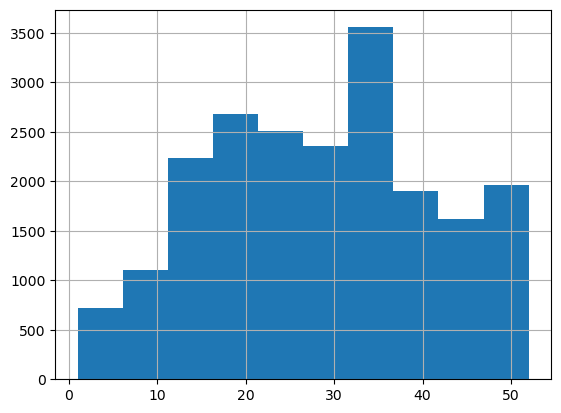

In [58]:
df.HouseAge.hist()

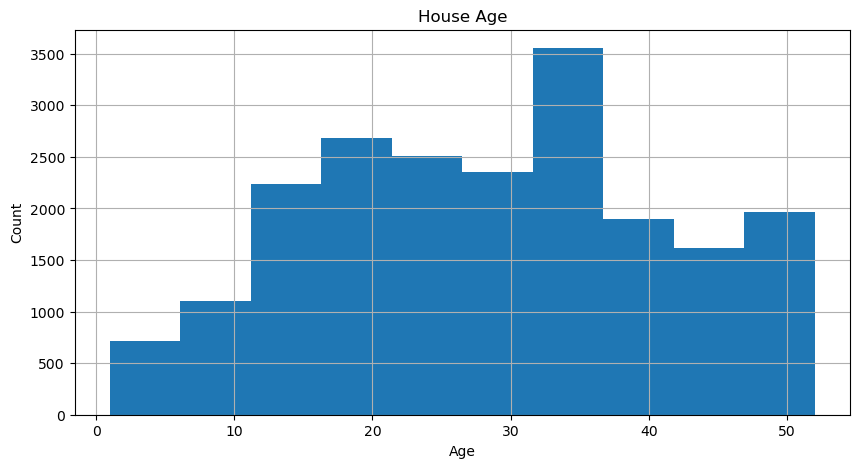

In [13]:
import matplotlib.pyplot as plt

df.HouseAge.hist(figsize=(10, 5))
plt.title('House Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

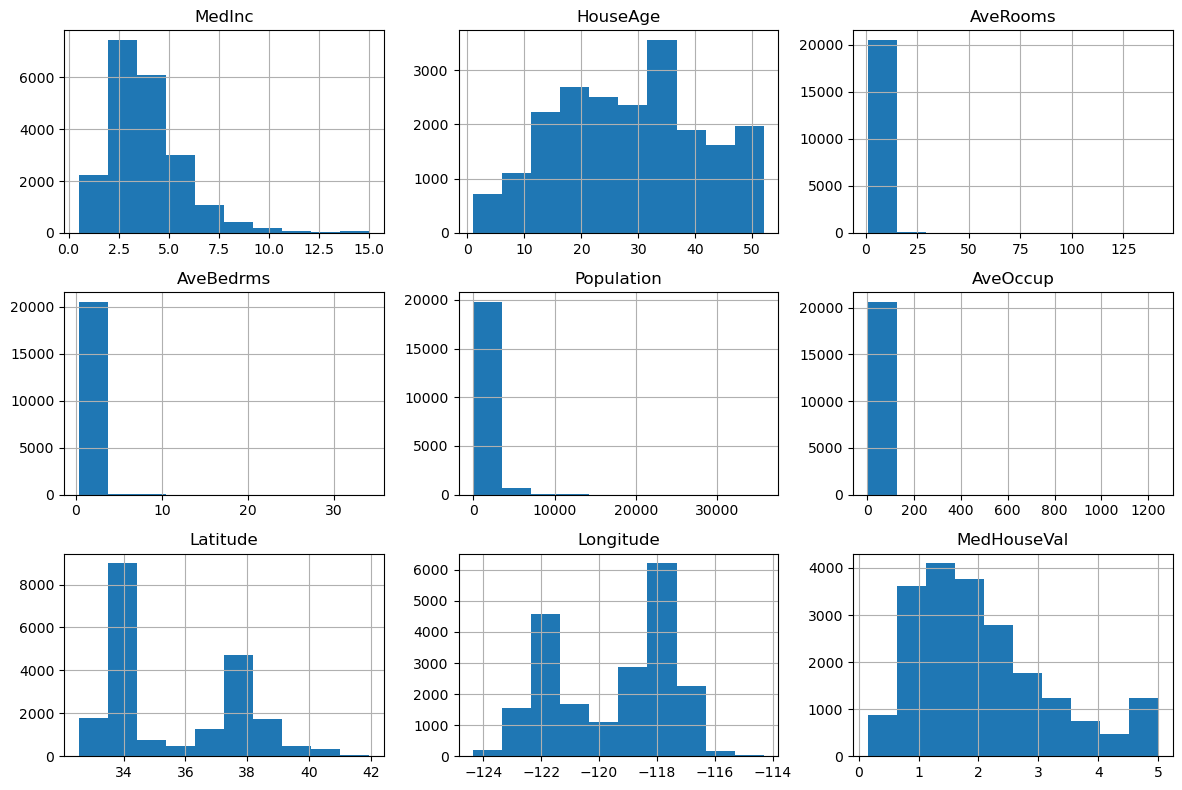

In [63]:
import matplotlib.pyplot as plt

df.hist(figsize=(12, 8))
plt.tight_layout()